# Instant Insanity Problem encoding

1. cube color orientation

In [2]:
# Represents the color of each face for the four cubes in their default orientation.
# R: Red, G: Green, B: Blue, W: White
cubes_default_orientation = [
    # Cube 1
    {
        "Front": "G", "Back": "W", "Top": "R", "Bottom": "B", "Left": "R", "Right": "R"
    },
    # Cube 2
    {
        "Front": "W", "Back": "B", "Top": "W", "Bottom": "G", "Left": "R", "Right": "B"
    },
    # Cube 3
    {
        "Front": "R", "Back": "G", "Top": "B", "Bottom": "W", "Left": "R", "Right": "W"
    },
    # Cube 4
    {
        "Front": "R", "Back": "G", "Top": "B", "Bottom": "B", "Left": "W", "Right": "G"
    }
]


2. orientation after rotation action

In [3]:
def get_orientation_from_binary(initial_orientation, b0, b1, b2):
    """
    Calculates the final orientation of a single cube by applying a sequence of 
    rotations based on three binary inputs.

    The rotations are applied sequentially: x0 (Z-axis), then x1 (X-axis), then x2 (Z-axis).

    Args:
        initial_orientation (dict): The starting orientation of the cube.
        b0 (int): Binary flag (0 or 1) for the 'x0' rotation.
        b1 (int): Binary flag (0 or 1) for the 'x1' rotation.
        b2 (int): Binary flag (0 or 1) for the 'x2' rotation.

    Returns:
        dict: The final orientation of the cube after applying the rotations.
    """
    current_orientation = initial_orientation.copy()

    # Apply rotation for b0 (x0: 90-degree rotation around Z-axis)
    if b0 == 1:
        original = current_orientation.copy()
        current_orientation['Top'] = original['Left']
        current_orientation['Right'] = original['Top']
        current_orientation['Bottom'] = original['Right']
        current_orientation['Left'] = original['Bottom']

    # Apply rotation for b1 (x1: 90-degree rotation around X-axis)
    if b1 == 1:
        original = current_orientation.copy()
        current_orientation['Top'] = original['Back']
        current_orientation['Front'] = original['Top']
        current_orientation['Bottom'] = original['Front']
        current_orientation['Back'] = original['Bottom']

    # Apply rotation for b2 (x2: 90-degree rotation around Z-axis)
    if b2 == 1:
        original = current_orientation.copy()
        current_orientation['Top'] = original['Left']
        current_orientation['Right'] = original['Top']
        current_orientation['Bottom'] = original['Right']
        current_orientation['Left'] = original['Bottom']
            
    return current_orientation

3. color orientation after rotation

In [ ]:
def get_all_cubes_orientations(initial_orientations_list, rotations_list):
    """
    Calculates the final orientations for a list of cubes based on a 
    corresponding list of binary rotation sequences.

    Args:
        initial_orientations_list (list): A list of dicts, where each dict is a cube's initial state.
        rotations_list (list): A list of tuples, where each tuple is a (b0, b1, b2) rotation sequence.
                               This list must be the same length aas initial_orientations_list.

    Returns:
        list: A list of dicts representing the final orientation of each cube.
    """
    if len(initial_orientations_list) != len(rotations_list):
        raise ValueError("The number of initial orientations must match the number of rotation sequences.")

    final_orientations = []
    for i in range(len(initial_orientations_list)):
        initial_orientation = initial_orientations_list[i]
        b0, b1, b2 = rotations_list[i]
        final_orientation = get_orientation_from_binary(initial_orientation, b0, b1, b2)
        final_orientations.append(final_orientation)
    
    return final_orientations


4. get color count

In [5]:
def get_all_cubes_orientations(initial_orientations_list, rotations_list):
    """
    Calculates the final orientations for a list of cubes based on a 
    corresponding list of binary rotation sequences.

    Args:
        initial_orientations_list (list): A list of dicts, where each dict is a cube's initial state.
        rotations_list (list): A list of tuples, where each tuple is a (b0, b1, b2) rotation sequence.
                               This list must be the same length as initial_orientations_list.

    Returns:
        list: A list of dicts representing the final orientation of each cube.
    """
    if len(initial_orientations_list) != len(rotations_list):
        raise ValueError("The number of initial orientations must match the number of rotation sequences.")

    final_orientations = []
    for i in range(len(initial_orientations_list)):
        initial_orientation = initial_orientations_list[i]
        b0, b1, b2 = rotations_list[i]
        final_orientation = get_orientation_from_binary(initial_orientation, b0, b1, b2)
        final_orientations.append(final_orientation)
    
    return final_orientations

def count_face_colors(final_cube_states):
    """
    Counts the occurrences of each color for the Top/Bottom and Left/Right face groups.

    Args:
        final_cube_states (list): A list of 4 dictionaries, where each dictionary
                                 represents a cube's final orientation.

    Returns:
        dict: A dictionary with keys like 'R_x', 'B_y', etc., representing the color counts.
    """
    colors = ["R", "B", "W", "G"]
    top_bottom_counts = {color: 0 for color in colors}
    left_right_counts = {color: 0 for color in colors}

    for cube_state in final_cube_states:
        # Tally Top and Bottom faces
        top_bottom_counts[cube_state['Top']] += 1
        top_bottom_counts[cube_state['Bottom']] += 1
        
        # Tally Left and Right faces
        left_right_counts[cube_state['Left']] += 1
        left_right_counts[cube_state['Right']] += 1
    
    # Format the final output dictionary with _x and _y suffixes
    final_counts = {}
    for color, count in left_right_counts.items():
        final_counts[f"{color}_x"] = count
    for color, count in top_bottom_counts.items():
        final_counts[f"{color}_y"] = count

    return final_counts

example usage

In [ ]:
if __name__ == '__main__':
    # Define a different rotation sequence for each of the four cubes.
    # (b0, b1, b2) for Cube 1, Cube 2, Cube 3, and Cube 4.
    rotations_for_all_cubes = [
        (1, 1, 0),  # For Cube 1
        (0, 1, 1),  # For Cube 2
        (1, 1, 1),  # For Cube 3
        (0, 1, 0)   # For Cube 4
    ]

    print("--- Applying Rotations to All Cubes ---")
    
    # 1. Calculate the final orientations for all cubes
    final_cube_states = get_all_cubes_orientations(cubes_default_orientation, rotations_for_all_cubes)

    # Print the intermediate results
    for i, cube_state in enumerate(final_cube_states):
        print(f"\n--- Final State Cube {i+1} (Rotation: {rotations_for_all_cubes[i]}) ---")
        for face, color in cube_state.items():
            print(f"  {face}: {color}")
    
    # 2. Count the colors on the specified faces
    color_counts = count_face_colors(final_cube_states)

    # 3. Print the final counts in the new format
    print("\n\n--- Final Color Counts ---")
    print(f"R_x: {color_counts['R_x']}, B_y: {color_counts['B_y']}, W_x: {color_counts['W_x']}, G_y: {color_counts['G_y']}")

--- Applying Rotations to All Cubes ---

--- Final State Cube 1 (Rotation: (1, 1, 0)) ---
  Front: R
  Back: R
  Top: W
  Bottom: G
  Left: B
  Right: R

--- Final State Cube 2 (Rotation: (0, 1, 1)) ---
  Front: W
  Back: G
  Top: R
  Bottom: B
  Left: W
  Right: B

--- Final State Cube 3 (Rotation: (1, 1, 1)) ---
  Front: R
  Back: W
  Top: W
  Bottom: B
  Left: R
  Right: G

--- Final State Cube 4 (Rotation: (0, 1, 0)) ---
  Front: B
  Back: B
  Top: G
  Bottom: R
  Left: W
  Right: G


--- Final Color Counts ---
R_x: 2, B_y: 2, W_x: 2, G_y: 2


In [28]:
# Represents the color of each face for the four cubes in their default orientation.
# R: Red, G: Green, B: Blue, W: White
cubes_default_orientation = [
    {"Front": "G", "Back": "W", "Top": "R", "Bottom": "B", "Left": "R", "Right": "R"}, # Cube 1
    {"Front": "W", "Back": "B", "Top": "W", "Bottom": "G", "Left": "R", "Right": "B"}, # Cube 2
    {"Front": "R", "Back": "G", "Top": "B", "Bottom": "W", "Left": "R", "Right": "W"}, # Cube 3
    {"Front": "R", "Back": "G", "Top": "B", "Bottom": "B", "Left": "W", "Right": "G"}  # Cube 4
]

def get_orientation_from_binary(initial_orientation, b0, b1, b2):
    current_orientation = initial_orientation.copy()
    # Apply rotation for b0
    if b0 == 1:
        original = current_orientation.copy()
        current_orientation['Top'], current_orientation['Right'], current_orientation['Bottom'], current_orientation['Left'] = \
            original['Left'], original['Top'], original['Right'], original['Bottom']
    # Apply rotation for b1
    if b1 == 1:
        original = current_orientation.copy()
        current_orientation['Top'], current_orientation['Front'], current_orientation['Bottom'], current_orientation['Back'] = \
            original['Back'], original['Top'], original['Front'], original['Bottom']
    # Apply rotation for b2
    if b2 == 1:
        original = current_orientation.copy()
        current_orientation['Top'], current_orientation['Right'], current_orientation['Bottom'], current_orientation['Left'] = \
            original['Left'], original['Top'], original['Right'], original['Bottom']
    return current_orientation

def calculate_cost(binary_vars):
    """Calculates the cost function for a given 12-bit binary string."""
    if len(binary_vars) != 12:
        raise ValueError("Input must be a 12-element binary vector.")

    # Get the final orientation of all 4 cubes
    rotations_list = [
        (binary_vars[0], binary_vars[1], binary_vars[2]),
        (binary_vars[3], binary_vars[4], binary_vars[5]),
        (binary_vars[6], binary_vars[7], binary_vars[8]),
        (binary_vars[9], binary_vars[10], binary_vars[11]),
    ]

    final_orientations = []
    for i in range(4):
        final_orientations.append(get_orientation_from_binary(
            cubes_default_orientation[i], *rotations_list[i]
        ))
    
    # Count the colors
    colors = ["R", "B", "W", "G"]
    top_bottom_counts = {color: 0 for color in colors}
    left_right_counts = {color: 0 for color in colors}

    for cube_state in final_orientations:
        top_bottom_counts[cube_state['Top']] += 1
        top_bottom_counts[cube_state['Bottom']] += 1
        left_right_counts[cube_state['Left']] += 1
        left_right_counts[cube_state['Right']] += 1
        
    # Return the color counts for left/right and top/bottom faces
    return left_right_counts, top_bottom_counts


In [34]:
from itertools import product

all_costs = []
for binary_input in product([0, 1], repeat=12):
    left_right_counts, top_bottom_counts = calculate_cost(list(binary_input))
    all_costs.append((binary_input, left_right_counts, top_bottom_counts))

# Example: print the first 5 results
for entry in all_costs:
    print("Input:", entry[0])
    print("Left/Right counts:", entry[1])
    print("Top/Bottom counts:", entry[2])
    print("---")

Input: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Left/Right counts: {'R': 4, 'B': 1, 'W': 2, 'G': 1}
Top/Bottom counts: {'R': 1, 'B': 4, 'W': 2, 'G': 1}
---
Input: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)
Left/Right counts: {'R': 4, 'B': 3, 'W': 1, 'G': 0}
Top/Bottom counts: {'R': 1, 'B': 2, 'W': 3, 'G': 2}
---
Input: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0)
Left/Right counts: {'R': 4, 'B': 1, 'W': 2, 'G': 1}
Top/Bottom counts: {'R': 2, 'B': 2, 'W': 2, 'G': 2}
---
Input: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1)
Left/Right counts: {'R': 5, 'B': 1, 'W': 1, 'G': 1}
Top/Bottom counts: {'R': 1, 'B': 2, 'W': 3, 'G': 2}
---
Input: (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)
Left/Right counts: {'R': 4, 'B': 3, 'W': 1, 'G': 0}
Top/Bottom counts: {'R': 1, 'B': 2, 'W': 3, 'G': 2}
---
Input: (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1)
Left/Right counts: {'R': 4, 'B': 1, 'W': 2, 'G': 1}
Top/Bottom counts: {'R': 1, 'B': 4, 'W': 2, 'G': 1}
---
Input: (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0)
Left/Right counts: {'R': 4, 'B': 3, 'W': 1, 

In [78]:
import numpy as np
from scipy.optimize import minimize
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import PauliEvolutionGate, XXPlusYYGate
from qiskit.primitives import Sampler, Estimator
import collections
import json
from itertools import product
from functools import lru_cache
import matplotlib.pyplot as plt

# Part 1: Classical Problem Definition

In [87]:
cubes_default_orientation = [
    {"Front": "G", "Back": "W", "Top": "R", "Bottom": "B", "Left": "R", "Right": "R"}, # Cube 1
    {"Front": "W", "Back": "B", "Top": "W", "Bottom": "G", "Left": "R", "Right": "B"}, # Cube 2
    {"Front": "R", "Back": "G", "Top": "B", "Bottom": "W", "Left": "R", "Right": "W"}, # Cube 3
    {"Front": "R", "Back": "G", "Top": "B", "Bottom": "B", "Left": "W", "Right": "G"}  # Cube 4
]

@lru_cache(maxsize=None)
def get_orientation_from_binary_string(cube_idx, b_str):
    initial_orientation = cubes_default_orientation[cube_idx]
    b0, b1, b2 = [int(b) for b in b_str]
    current_orientation = initial_orientation.copy()
    if b0 == 1:
        original = current_orientation.copy()
        current_orientation['Top'], current_orientation['Right'], current_orientation['Bottom'], current_orientation['Left'] = \
            original['Left'], original['Top'], original['Right'], original['Bottom']
    if b1 == 1:
        original = current_orientation.copy()
        current_orientation['Top'], current_orientation['Front'], current_orientation['Bottom'], current_orientation['Back'] = \
            original['Back'], original['Top'], original['Front'], original['Bottom']
    if b2 == 1:
        original = current_orientation.copy()
        current_orientation['Top'], current_orientation['Right'], current_orientation['Bottom'], current_orientation['Left'] = \
            original['Left'], original['Top'], original['Right'], original['Bottom']
    return current_orientation

# Part 2: Building the Cost Hamiltonian from First Principles

In [88]:
NUM_QUBITS = 12

@lru_cache(maxsize=None)
def get_binary_poly_coeffs(cube_idx, face, color):
    y = np.zeros(8)
    for j, b_vars in enumerate(product([0, 1], repeat=3)):
        b_str = "".join(map(str, b_vars))
        orientation = get_orientation_from_binary_string(cube_idx, b_str)
        if orientation[face] == color:
            y[j] = 1

    M = np.zeros((8, 8))
    for i, z_vars in enumerate(product([0, 1], repeat=3)):
        z0, z1, z2 = z_vars
        M[i, :] = [1, z0, z1, z2, z0*z1, z0*z2, z1*z2, z0*z1*z2]
    
    coeffs = np.linalg.solve(M, y)
    
    poly_map = {}
    term_map = [(), (0,), (1,), (2,), (0, 1), (0, 2), (1, 2), (0, 1, 2)]
    for i, c in enumerate(coeffs):
        if not np.isclose(c, 0):
            poly_map[term_map[i]] = c
    return poly_map

def term_to_pauli(term_indices, coeff, num_qubits):
    op = SparsePauliOp("I" * num_qubits, coeffs=[coeff])
    identity = SparsePauliOp.from_list([("I" * num_qubits, 1)])
    for i in term_indices:
        pauli_str = ["I"] * num_qubits
        pauli_str[num_qubits - 1 - i] = "Z"
        z_i_op = (identity - SparsePauliOp("".join(pauli_str))) * 0.5
        op = op @ z_i_op
    return op

def get_indicator_pauli(cube_idx, face, color, num_qubits):
    poly_coeffs = get_binary_poly_coeffs(cube_idx, face, color)
    total_op = SparsePauliOp("I" * num_qubits, coeffs=[0])
    for local_terms, coeff in poly_coeffs.items():
        global_indices = [t + 3 * cube_idx for t in local_terms]
        pauli_term = term_to_pauli(global_indices, coeff, num_qubits)
        total_op += pauli_term
    return total_op.simplify()

@lru_cache(maxsize=1)
def build_cost_hamiltonian(num_qubits):
    print("Building cost Hamiltonian from constraints...")
    colors = ["R", "B", "W", "G"]
    
    N_ops = {"TopBottom": {}, "LeftRight": {}}
    for c in colors:
        N_ops["TopBottom"][c] = SparsePauliOp("I" * num_qubits, coeffs=[0])
        N_ops["LeftRight"][c] = SparsePauliOp("I" * num_qubits, coeffs=[0])
    
    for i in range(4):
        for c in colors:
            N_ops["TopBottom"][c] += get_indicator_pauli(i, 'Top', c, num_qubits)
            N_ops["TopBottom"][c] += get_indicator_pauli(i, 'Bottom', c, num_qubits)
            N_ops["LeftRight"][c] += get_indicator_pauli(i, 'Left', c, num_qubits)
            N_ops["LeftRight"][c] += get_indicator_pauli(i, 'Right', c, num_qubits)

    cost_op = SparsePauliOp("I" * num_qubits, coeffs=[0])
    identity_op = SparsePauliOp("I" * num_qubits, coeffs=[1])
    
    for group in ["TopBottom", "LeftRight"]:
        for c in colors:
            N_c = N_ops[group][c].simplify()
            term_op = (N_c @ N_c) - (4 * N_c) + (4 * identity_op)
            cost_op += term_op
    
    print("Hamiltonian built and cached.")
    return cost_op.simplify()

# Part 3: QAOA Implementation

In [22]:
def create_qaoa_circ(params, cost_hamiltonian, p, mixer_type='xy'):
    num_qubits = cost_hamiltonian.num_qubits
    betas = params[:p]
    gammas = params[p:]
    
    qc = QuantumCircuit(num_qubits)
    qc.h(range(num_qubits))
    
    for i in range(p):
        evolution_gate = PauliEvolutionGate(cost_hamiltonian, time=gammas[i])
        qc.append(evolution_gate, range(num_qubits))
        qc.barrier()
        if mixer_type == 'xy':
            xy_gate = XXPlusYYGate(2 * betas[i])
            for j in range(4):
                q_indices = [3 * j, 3 * j + 1, 3 * j + 2]
                qc.append(xy_gate, [q_indices[0], q_indices[1]])
                qc.append(xy_gate, [q_indices[1], q_indices[2]])
                qc.append(xy_gate, [q_indices[2], q_indices[0]])
        else:
            qc.rx(2 * betas[i], range(num_qubits))
    return qc

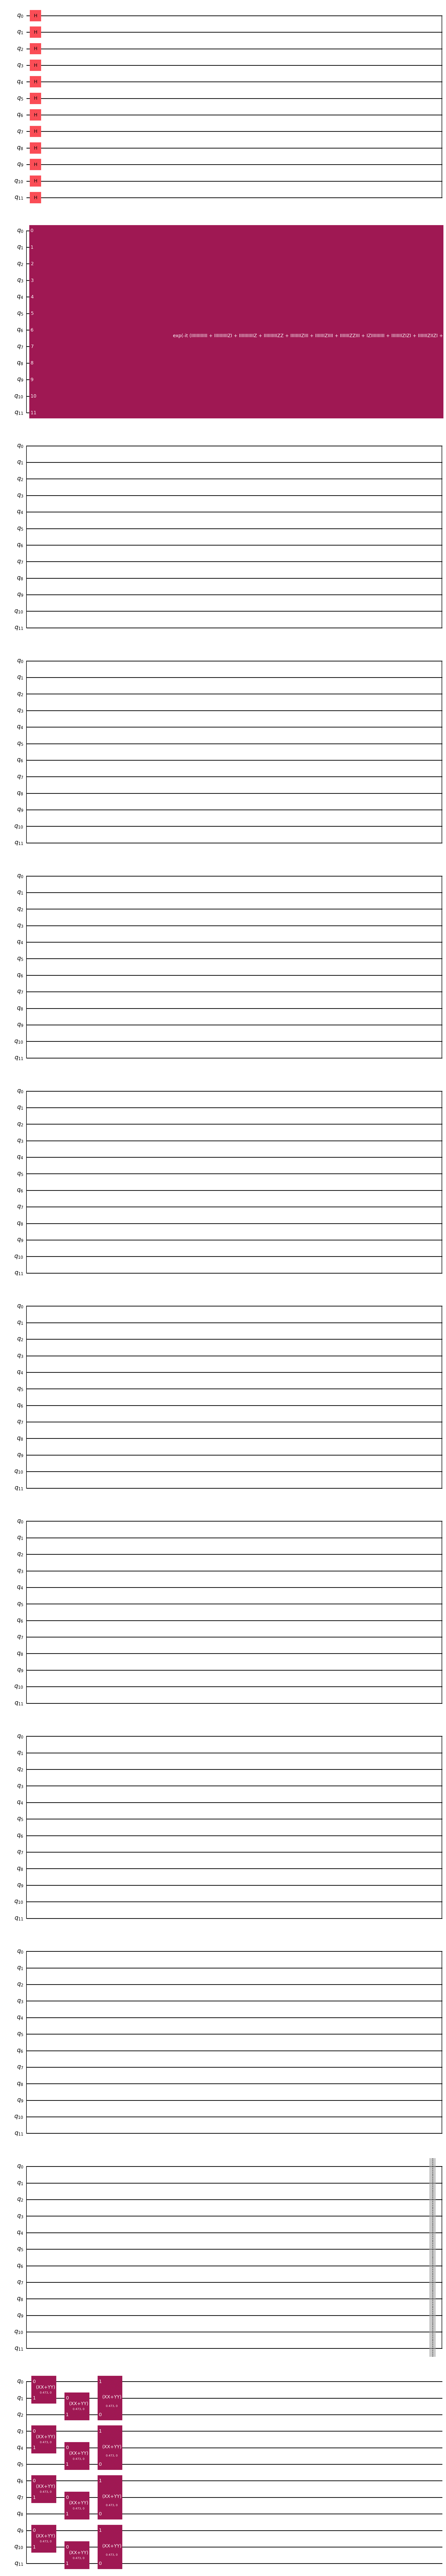

In [6]:
cost_hamiltonian = build_cost_hamiltonian(NUM_QUBITS)
p = 1
final_qc = create_qaoa_circ(np.random.rand(2 * p) * np.pi, cost_hamiltonian, p)
final_qc.draw('mpl')

In [80]:
#final_qc.decompose().draw('mpl')

In [ ]:
# pip install qiskit qiskit-aer scipy numpy qiskit-optimization matplotlib

In [2]:
import numpy as np
from scipy.optimize import minimize
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import PauliEvolutionGate, XXPlusYYGate
from qiskit.primitives import Sampler, Estimator
import collections
from itertools import product
from functools import lru_cache
import matplotlib.pyplot as plt

# Part 1: Classical Problem Definition

In [3]:
cubes_default_orientation = [
    {"Front": "G", "Back": "W", "Top": "R", "Bottom": "B", "Left": "R", "Right": "R"}, # Cube 1
    {"Front": "W", "Back": "B", "Top": "W", "Bottom": "G", "Left": "R", "Right": "B"}, # Cube 2
    {"Front": "R", "Back": "G", "Top": "B", "Bottom": "W", "Left": "R", "Right": "W"}, # Cube 3
    {"Front": "R", "Back": "G", "Top": "B", "Bottom": "B", "Left": "W", "Right": "G"}  # Cube 4
]

@lru_cache(maxsize=None)
def get_orientation_from_binary_string(cube_idx, b_str):
    """Calculates a cube's face orientations based on a 3-bit string."""
    initial_orientation = cubes_default_orientation[cube_idx]
    b0, b1, b2 = [int(b) for b in b_str]
    current_orientation = initial_orientation.copy()
    if b0 == 1:
        original = current_orientation.copy()
        current_orientation['Top'], current_orientation['Right'], current_orientation['Bottom'], current_orientation['Left'] = \
            original['Left'], original['Top'], original['Right'], original['Bottom']
    if b1 == 1:
        original = current_orientation.copy()
        current_orientation['Top'], current_orientation['Front'], current_orientation['Bottom'], current_orientation['Back'] = \
            original['Back'], original['Top'], original['Front'], original['Bottom']
    if b2 == 1:
        original = current_orientation.copy()
        current_orientation['Top'], current_orientation['Right'], current_orientation['Bottom'], current_orientation['Left'] = \
            original['Left'], original['Top'], original['Right'], original['Bottom']
    return current_orientation

def calculate_classical_cost(bitstring):
    """Helper function to calculate the classical cost for a single 12-bit string."""
    current_cost = 0
    orientations = [get_orientation_from_binary_string(i, bitstring[3*i:3*i+3]) for i in range(4)]
    
    tb_counts = collections.defaultdict(int)
    lr_counts = collections.defaultdict(int)
    for o in orientations:
        tb_counts[o['Top']] += 1; tb_counts[o['Bottom']] += 1
        lr_counts[o['Left']] += 1; lr_counts[o['Right']] += 1
    
    for c in ["R", "B", "W", "G"]:
        current_cost += (tb_counts[c] - 2)**2
        current_cost += (lr_counts[c] - 2)**2
    return current_cost

# Part 2: Building the Cost Hamiltonian from First Principles

In [4]:
NUM_QUBITS = 12

@lru_cache(maxsize=None)
def get_binary_poly_coeffs(cube_idx, face, color):
    y = np.zeros(8)
    for j, b_vars in enumerate(product([0, 1], repeat=3)):
        b_str = "".join(map(str, b_vars))
        orientation = get_orientation_from_binary_string(cube_idx, b_str)
        if orientation[face] == color:
            y[j] = 1

    M = np.zeros((8, 8))
    for i, z_vars in enumerate(product([0, 1], repeat=3)):
        z0, z1, z2 = z_vars
        M[i, :] = [1, z0, z1, z2, z0*z1, z0*z2, z1*z2, z0*z1*z2]
    
    coeffs = np.linalg.solve(M, y)
    
    poly_map = {}
    term_map = [(), (0,), (1,), (2,), (0, 1), (0, 2), (1, 2), (0, 1, 2)]
    for i, c in enumerate(coeffs):
        if not np.isclose(c, 0):
            poly_map[term_map[i]] = c
    return poly_map

def term_to_pauli(term_indices, coeff, num_qubits):
    op = SparsePauliOp("I" * num_qubits, coeffs=[coeff])
    identity = SparsePauliOp.from_list([("I" * num_qubits, 1)])
    for i in term_indices:
        pauli_str = ["I"] * num_qubits
        pauli_str[num_qubits - 1 - i] = "Z"
        z_i_op = (identity - SparsePauliOp("".join(pauli_str))) * 0.5
        op = op @ z_i_op
    return op

def get_indicator_pauli(cube_idx, face, color, num_qubits):
    poly_coeffs = get_binary_poly_coeffs(cube_idx, face, color)
    total_op = SparsePauliOp("I" * num_qubits, coeffs=[0])
    for local_terms, coeff in poly_coeffs.items():
        global_indices = [t + 3 * cube_idx for t in local_terms]
        pauli_term = term_to_pauli(global_indices, coeff, num_qubits)
        total_op += pauli_term
    return total_op.simplify()

@lru_cache(maxsize=1)
def build_cost_hamiltonian(num_qubits):
    print("Building cost Hamiltonian from constraints...")
    colors = ["R", "B", "W", "G"]
    
    N_ops = {"TopBottom": {}, "LeftRight": {}}
    for c in colors:
        N_ops["TopBottom"][c] = SparsePauliOp("I" * num_qubits, coeffs=[0])
        N_ops["LeftRight"][c] = SparsePauliOp("I" * num_qubits, coeffs=[0])
    
    for i in range(4):
        for c in colors:
            N_ops["TopBottom"][c] += get_indicator_pauli(i, 'Top', c, num_qubits)
            N_ops["TopBottom"][c] += get_indicator_pauli(i, 'Bottom', c, num_qubits)
            N_ops["LeftRight"][c] += get_indicator_pauli(i, 'Left', c, num_qubits)
            N_ops["LeftRight"][c] += get_indicator_pauli(i, 'Right', c, num_qubits)

    cost_op = SparsePauliOp("I" * num_qubits, coeffs=[0])
    identity_op = SparsePauliOp("I" * num_qubits, coeffs=[1])
    
    for group in ["TopBottom", "LeftRight"]:
        for c in colors:
            N_c = N_ops[group][c].simplify()
            term_op = (N_c @ N_c) - (4 * N_c) + (4 * identity_op)
            cost_op += term_op
    
    print("Hamiltonian built and cached.")
    return cost_op.simplify()

# Part 3: QAOA Implementation

In [5]:
def create_qaoa_circ(params, cost_hamiltonian, p, mixer_type='xy'):
    """Creates the parameterized QAOA circuit."""
    num_qubits = cost_hamiltonian.num_qubits
    betas = params[:p]
    gammas = params[p:]
    
    qc = QuantumCircuit(num_qubits)
    qc.h(range(num_qubits))
    
    for i in range(p):
        evolution_gate = PauliEvolutionGate(cost_hamiltonian, time=gammas[i])
        qc.append(evolution_gate, range(num_qubits))
        
        if mixer_type == 'xy':
            xy_gate = XXPlusYYGate(2 * betas[i])
            for j in range(4):
                q_indices = [3 * j, 3 * j + 1, 3 * j + 2]
                qc.append(xy_gate, [q_indices[0], q_indices[1]])
                qc.append(xy_gate, [q_indices[1], q_indices[2]])
                qc.append(xy_gate, [q_indices[2], q_indices[0]])
        else:
            qc.rx(2 * betas[i], range(num_qubits))
    return qc

def display_top_states_info(quasi_dists, num_states=5):
    """
    Calculates costs for the top N most probable states and prints the results.
    """
    print(f"{'Rank':<5} | {'Bitstring':^{NUM_QUBITS}} | {'Probability':<15} | {'Classical Cost'}")
    print("-" * (30 + NUM_QUBITS))
    
    sorted_dists = sorted(quasi_dists.items(), key=lambda item: item[1], reverse=True)[:num_states]
    
    for i, (state_int, prob) in enumerate(sorted_dists):
        bitstring = f'{state_int:0{NUM_QUBITS}b}'
        cost = calculate_classical_cost(bitstring)
        print(f"{i+1:<5} | {bitstring:<{NUM_QUBITS}} | {prob:<15.5f} | {cost}")
    print("-" * (30 + NUM_QUBITS))

def run_qaoa_for_depth(p, cost_hamiltonian, estimator, sampler):
    def objective_function(params):
        qc = create_qaoa_circ(params, cost_hamiltonian, p)
        job = estimator.run([qc], [cost_hamiltonian])
        result = job.result()
        return result.values[0]

    print(f"\n{'='*15} depth p={p} {'='*15}")
    initial_params = np.random.rand(2 * p) * np.pi
    res = minimize(objective_function, initial_params, method='COBYLA', options={'maxiter': 250, 'disp': False})

    final_qc = create_qaoa_circ(res.x, cost_hamiltonian, p)
    final_qc.measure_all()

    sampler_job = sampler.run(final_qc, shots=10000)
    sampler_result = sampler_job.result()
    quasi_dists = sampler_result.quasi_dists[0]

    return quasi_dists

/tmp/ipykernel_183112/468872347.py:2: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()
/tmp/ipykernel_183112/468872347.py:3: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Building cost Hamiltonian from constraints...
Hamiltonian built and cached.

=============== depth p=20 ===============

Plotting sorted probability distribution for depth 20...


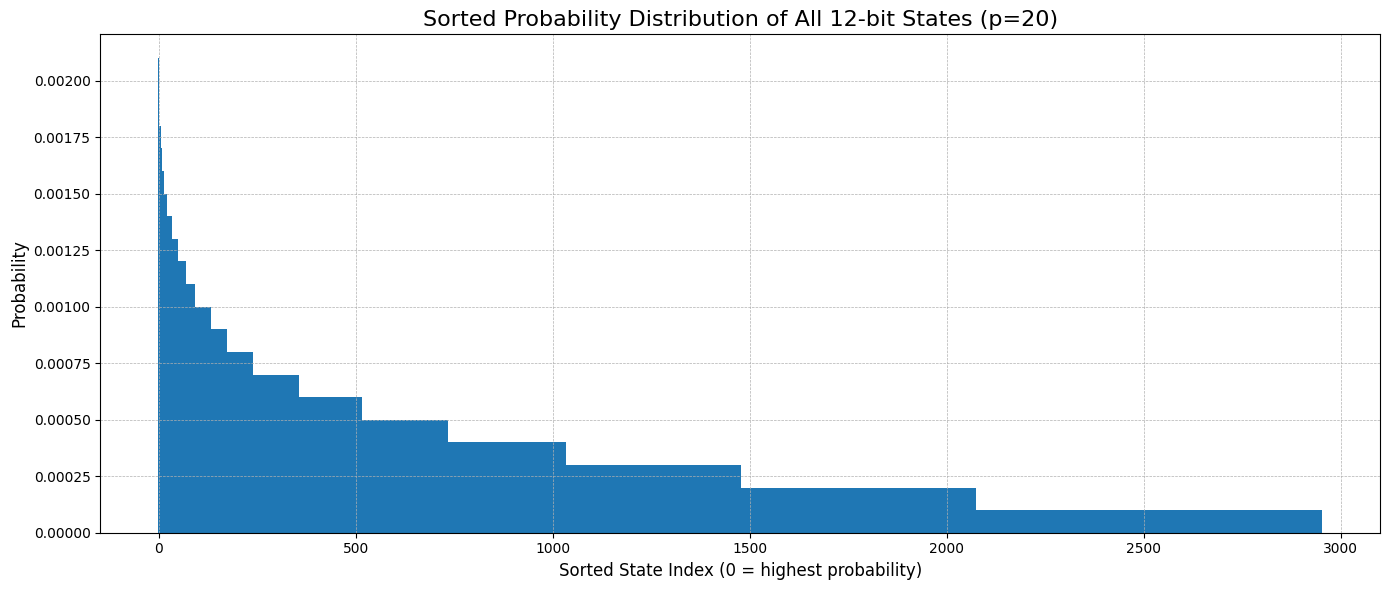

In [6]:
def main():
    estimator = Estimator()
    sampler = Sampler()
    cost_hamiltonian = build_cost_hamiltonian(NUM_QUBITS)

    p = 20
    quasi_dists = run_qaoa_for_depth(p, cost_hamiltonian, estimator, sampler)

    print("\nPlotting sorted probability distribution for depth 20...")
    sorted_probs = sorted(quasi_dists.values(), reverse=True)

    plt.figure(figsize=(14, 6))
    plt.bar(range(len(sorted_probs)), sorted_probs, width=1.0)
    plt.title("Sorted Probability Distribution of All 12-bit States (p=20)", fontsize=16)
    plt.xlabel("Sorted State Index (0 = highest probability)", fontsize=12)
    plt.ylabel("Probability", fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
def main():
    estimator = Estimator()
    sampler = Sampler()
    cost_hamiltonian = build_cost_hamiltonian(NUM_QUBITS)

    for p in range(20, 101, 10):
        quasi_dists = run_qaoa_for_depth(p, cost_hamiltonian, estimator, sampler)
        sorted_items = sorted(quasi_dists.items(), key=lambda x: x[1], reverse=True)
        sorted_probs = []
        sorted_costs = []

        for state_int, prob in sorted_items:
            bitstring = f"{state_int:012b}"
            cost = calculate_classical_cost(bitstring)
            sorted_probs.append(prob)
            sorted_costs.append(cost)

        fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

        axs[0].bar(range(len(sorted_probs)), sorted_probs, width=1.0)
        axs[0].set_title(f"Sorted Probability Distribution (p={p})", fontsize=14)
        axs[0].set_ylabel("Probability", fontsize=12)
        axs[0].set_ylim(0, 0.005)
        axs[0].grid(True, linestyle='--', linewidth=0.5)

        axs[1].bar(range(len(sorted_costs)), sorted_costs, width=1.0, color='orange')
        axs[1].set_title(f"Classical Cost of Corresponding States (p={p})", fontsize=14)
        axs[1].set_xlabel("Sorted State Index (0 = highest probability)", fontsize=12)
        axs[1].set_ylabel("Classical Cost", fontsize=12)
        axs[1].grid(True, linestyle='--', linewidth=0.5)

        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    main()


/tmp/ipykernel_183112/2430562070.py:2: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()
/tmp/ipykernel_183112/2430562070.py:3: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()



=============== depth p=20 ===============
